In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
pd.set_option("display.float_format", lambda x: '%.5f' % x)

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
empatica = "Empatica1669790270.123484.csv"
emotibit = "EmotiBit1669789551.9829628.csv"

In [4]:
df_empatica = pd.read_csv(empatica)

df_emotibit = pd.read_csv(emotibit)

In [5]:
df_empatica

,System Epoch,Device,Category,E4 Epoch,Value
0,1669789559367,E4,Gsr,1669789558.46500,1.40152
1,1669789559370,E4,Gsr,1669789558.71500,1.40536
2,1669789559370,E4,Gsr,1669789558.96500,1.40793
3,1669789559370,E4,Gsr,1669789559.21500,1.39768
4,1669789559370,E4,Gsr,1669789559.46500,1.39512
...,...,...,...,...,...
2461,1669790174306,E4,Gsr,1669790173.71500,1.15689
2462,1669790174307,E4,Gsr,1669790173.96500,1.14664
2463,1669790174307,E4,Gsr,1669790174.21500,1.13255
2464,1669790174307,E4,Gsr,1669790174.46500,1.12743


Normalizing

In [6]:
df_emotibit["EDA"] = (df_emotibit["EDA"]-df_emotibit["EDA"].min()) / (df_emotibit["EDA"].max()-df_emotibit["EDA"].min())

df_empatica["Value"] = (df_empatica["Value"]-df_empatica["Value"].min()) / (df_empatica["Value"].max()-df_empatica["Value"].min())

Delta Column for Empatica Data

In [7]:
df_empatica["E4 Epoch"] = df_empatica["E4 Epoch"] *1000

In [8]:
offset = df_empatica["System Epoch"][0]-df_empatica["E4 Epoch"][0] 
offset

902.0

In [9]:
df_empatica["Corrected Epoch"] = df_empatica["E4 Epoch"] + offset

In [10]:
df_empatica

,System Epoch,Device,Category,E4 Epoch,Value,Corrected Epoch
0,1669789559367,E4,Gsr,1669789558465.00000,0.87221,1669789559367.00000
1,1669789559370,E4,Gsr,1669789558715.00000,0.87582,1669789559617.00000
2,1669789559370,E4,Gsr,1669789558965.00000,0.87823,1669789559867.00000
3,1669789559370,E4,Gsr,1669789559215.00000,0.86859,1669789560117.00000
4,1669789559370,E4,Gsr,1669789559465.00000,0.86618,1669789560367.00000
...,...,...,...,...,...,...
2461,1669790174306,E4,Gsr,1669790173715.00000,0.64211,1669790174617.00000
2462,1669790174307,E4,Gsr,1669790173965.00000,0.63247,1669790174867.00000
2463,1669790174307,E4,Gsr,1669790174215.00000,0.61922,1669790175117.00000
2464,1669790174307,E4,Gsr,1669790174465.00000,0.61440,1669790175367.00000


Converting to timestamp and creating new column for readability and being able to align the data

In [11]:
df_empatica["Date"] = pd.to_datetime(df_empatica["Corrected Epoch"], unit='ms')

df_emotibit["Timestamp"] = df_emotibit["Timestamp"] *1000

df_emotibit["Date"] = pd.to_datetime(df_emotibit["Timestamp"], unit='ms')

Aligning the data

In [12]:
val = df_empatica["Date"][0]

df_emotibit["Date"]=df_emotibit[df_emotibit["Date"]>=val]

df_emotibit.dropna(inplace=True)

Graphing the Data

In [13]:
Left = df_empatica["Value"].dropna()

Clipping Major Outliers

In [14]:
df_empatica = df_empatica[df_empatica.Value<5]
df_empatica = df_empatica[df_empatica.Value>=0]

In [15]:
Right = df_emotibit["EDA"]

In [16]:
df_empatica

,System Epoch,Device,Category,E4 Epoch,Value,Corrected Epoch,Date
0,1669789559367,E4,Gsr,1669789558465.00000,0.87221,1669789559367.00000,2022-11-30 06:25:59.367000064
1,1669789559370,E4,Gsr,1669789558715.00000,0.87582,1669789559617.00000,2022-11-30 06:25:59.616999936
2,1669789559370,E4,Gsr,1669789558965.00000,0.87823,1669789559867.00000,2022-11-30 06:25:59.867000064
3,1669789559370,E4,Gsr,1669789559215.00000,0.86859,1669789560117.00000,2022-11-30 06:26:00.116999936
4,1669789559370,E4,Gsr,1669789559465.00000,0.86618,1669789560367.00000,2022-11-30 06:26:00.367000064
...,...,...,...,...,...,...,...
2461,1669790174306,E4,Gsr,1669790173715.00000,0.64211,1669790174617.00000,2022-11-30 06:36:14.616999936
2462,1669790174307,E4,Gsr,1669790173965.00000,0.63247,1669790174867.00000,2022-11-30 06:36:14.867000064
2463,1669790174307,E4,Gsr,1669790174215.00000,0.61922,1669790175117.00000,2022-11-30 06:36:15.116999936
2464,1669790174307,E4,Gsr,1669790174465.00000,0.61440,1669790175367.00000,2022-11-30 06:36:15.367000064


In [17]:
df_emotibit["Date"] = pd.to_datetime(df_emotibit["Date"], unit='ms')

In [18]:
pd.set_option('display.max_rows', 500)

In [19]:
df_emotibit[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df_emotibit['Date']])

# Emotibit Finger

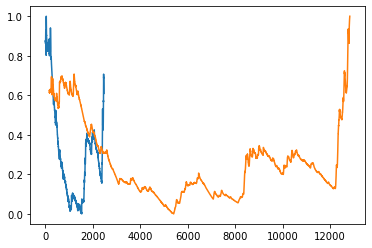

In [20]:
plt.plot(figsize=(12,6))
plt.plot(Left)
plt.plot(Right)

In [21]:
Right = Right[::5]

In [22]:
Right =Right.reset_index()

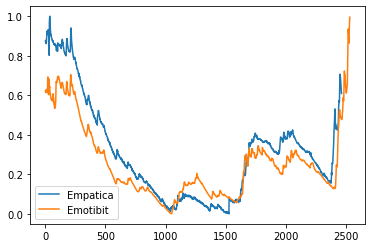

In [23]:
plt.plot(figsize=(12,6))
plt.plot(Left)
plt.plot(Right["EDA"])
plt.legend(['Empatica', 'Emotibit'])

In [24]:
mean_emotibit=df_emotibit.groupby(['m', 's']).mean()

In [25]:
df_empatica[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df_empatica['Date']])

In [26]:
mean_empatica = df_empatica.groupby(['m', 's']).mean()

In [27]:
mean_emotibit.reset_index(inplace=True)
mean_empatica.reset_index(inplace=True)

In [28]:
emp = mean_empatica["Value"]
emo = mean_emotibit["EDA"]

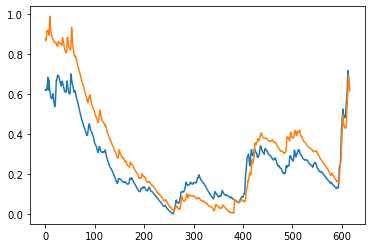

In [29]:
plt.plot(figsize=(12,6))
plt.plot(emo)
plt.plot(emp)

In [30]:
mean_empatica

,m,s,System Epoch,E4 Epoch,Value,Corrected Epoch,h
0,25,59,1669789559369.00000,1669789558715.00000,0.87542,1669789559617.00000,6.00000
1,26,0,1669789559746.50000,1669789559590.00000,0.86468,1669789560492.00000,6.00000
2,26,1,1669789560877.50000,1669789560590.00000,0.87552,1669789561492.00000,6.00000
3,26,2,1669789561990.25000,1669789561590.00000,0.91648,1669789562492.00000,6.00000
4,26,3,1669789562737.75000,1669789562590.00000,0.91648,1669789563492.00000,6.00000
...,...,...,...,...,...,...,...
612,36,11,1669790170934.50000,1669790170590.00000,0.60687,1669790171492.00000,6.00000
613,36,12,1669790171688.75000,1669790171590.00000,0.69210,1669790172492.00000,6.00000
614,36,13,1669790172819.75000,1669790172590.00000,0.68367,1669790173492.00000,6.00000
615,36,14,1669790173934.75000,1669790173590.00000,0.64783,1669790174492.00000,6.00000


In [31]:
fig = go.Figure()

In [32]:
mean_emotibit.rename(columns={"Timestamp": "Corrected Epoch", "EDA": "Value"}, inplace=True)

In [33]:
mean_emotibit

,m,s,Corrected Epoch,Value,h
0,26.00000,7.00000,1669789559737.37231,0.61807,6.00000
1,26.00000,8.00000,1669789560725.53491,0.61671,6.00000
2,26.00000,9.00000,1669789561748.21851,0.62613,6.00000
3,26.00000,10.00000,1669789562667.37646,0.62128,6.00000
4,26.00000,11.00000,1669789563837.88916,0.65312,6.00000
...,...,...,...,...,...
611,36.00000,18.00000,1669790170783.27295,0.63858,6.00000
612,36.00000,19.00000,1669790171949.86938,0.71597,6.00000
613,36.00000,20.00000,1669790172915.20972,0.69817,6.00000
614,36.00000,21.00000,1669790173875.78247,0.66195,6.00000


In [34]:
dfs = {"df1": mean_empatica, "df2":mean_emotibit}

In [35]:
for i in dfs:
    fig.add_trace(go.Scatter(x=dfs[i]["Corrected Epoch"], y=dfs[i]["Value"], name= i))

In [38]:
fig.update_layout(xaxis=dict(tickformat='d'))

In [37]:
fig.show()